### TODO
+ Construct Overlay Function
+ Formalize Postprocess functions


In [2]:
# Import using scikit-video
import skvideo
#skvideo.setFFmpegPath("/usr/local/bin")
import skvideo.io
import skvideo.datasets
import matplotlib.pyplot as plt
import numpy as np

# Recommended ways of Trackpy
import pims
import trackpy as tp

from IPython.display import display
import ipywidgets as widgets

In [8]:
from ipywidgets import widgets, interactive
v = interactive(by_q, quarter=(['q1y2015', 'q2y2015', 'q3y2015', 'q4y2015']), days=(1, 180))
display(v)


NameError: name 'by_q' is not defined

In [3]:
def video_to_ndarray(path):
    """
    Parse a video file to an ndarray. Only works for complete formats, which include video metadata.
    """
    videodata = skvideo.io.vread(path)
    print("Shape: ", videodata.shape)
    return videodata


vid_path = "/Users/byatharth/code/SwimmingAlgaeVideos/Videos-Batch1/test_many_12mp.mjpeg"
stack = video_to_ndarray(vid_path)

Shape:  (71, 3040, 4056, 3)


In [39]:
import PIL
image = widgets.Image(
    value=stack[slider.value].tobytes(),
    format='rgb',
    width=400,
    height=400,
    
)

play = widgets.Play(
    value=0,
    min=0,
    max=stack.shape[0]-1,
    step=1,
    interval=500,
    description="Press play",
    disabled=False
)

slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (slider, 'value'))
#widgets.jslink((play, 'value'), image)
widgets.HBox([play, slider])

widgets.interact(lambda : PIL.Image.fromarray(stack[slider.value]).resize([400, 400]), x=slider)


#vidpreview = Video.from_file(vid_path)
#vidpreview

interactive(children=(Output(),), _dom_classes=('widget-interact',))

<function __main__.<lambda>()>

In [5]:
# $$$ Expensive  
# Trying the matplotlib animation method
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()


# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(stack.shape[0]):
    im = ax.imshow(stack[i], animated=False)
    if i == 0:
        ax.imshow(stack[0])  # show an initial one first
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)
plt.show()

/Users/byatharth/opt/miniconda3/envs/swim/lib/python3.8/site-packages/matplotlib/animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


KeyboardInterrupt: 

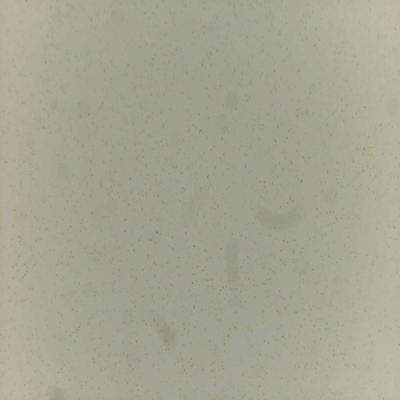

In [24]:
import PIL
PIL.Image.fromarray(stack[slider.value]).resize([400, 400])

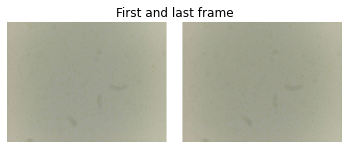

In [3]:
%matplotlib inline
def frames_preview(stack):
    """
    Shows the first and last frame of the image stack. Useful for inspection.
    """
    hstack = np.hstack([stack[0], np.full((stack[0].shape[0], \
                        round(stack[0].shape[1]*0.1), stack[0].shape[2]), 255, dtype=stack[0].dtype),
                        stack[-1]])
    plt.title("First and last frame")
    plt.axis('off')
    plt.imshow(hstack)
frames_preview(stack)

In [4]:
def fixed_crop(stack):
    """
    Crops the entire stack to a circular field of view by object etection. #TODO 
    Assumes that the first dimension is the number of frames.
    """
    # Crop image
    pass
    import numpy as np
    videodata_ = np.ndarray([videodata.shape[0], 1500-250, videodata.shape[2], videodata.shape[3]])
    videodata_.shape

In [5]:
def get_color_ch(stack, ch_id):
    """
    Returns a particlar color channel.
    """
    
    if isinstance(ch_id, str):
        map_ = {'r': 0, 'g': 1, 'b': 2}
        ch_id = map_[ch_id]
    channel = stack[:, :, :, ch_id]
    return channel

def grayscale_float(stack, cast=np.uint8):
    """
    Returns a float64 image, which is not very useful.
    """
    from skimage.color import rgb2gray
    return np.astype(np.round(rgb2gray(stack)))


#gray = grayscale(stack)


(71, 3040, 4056)
uint8


<IPython.core.display.Javascript object>


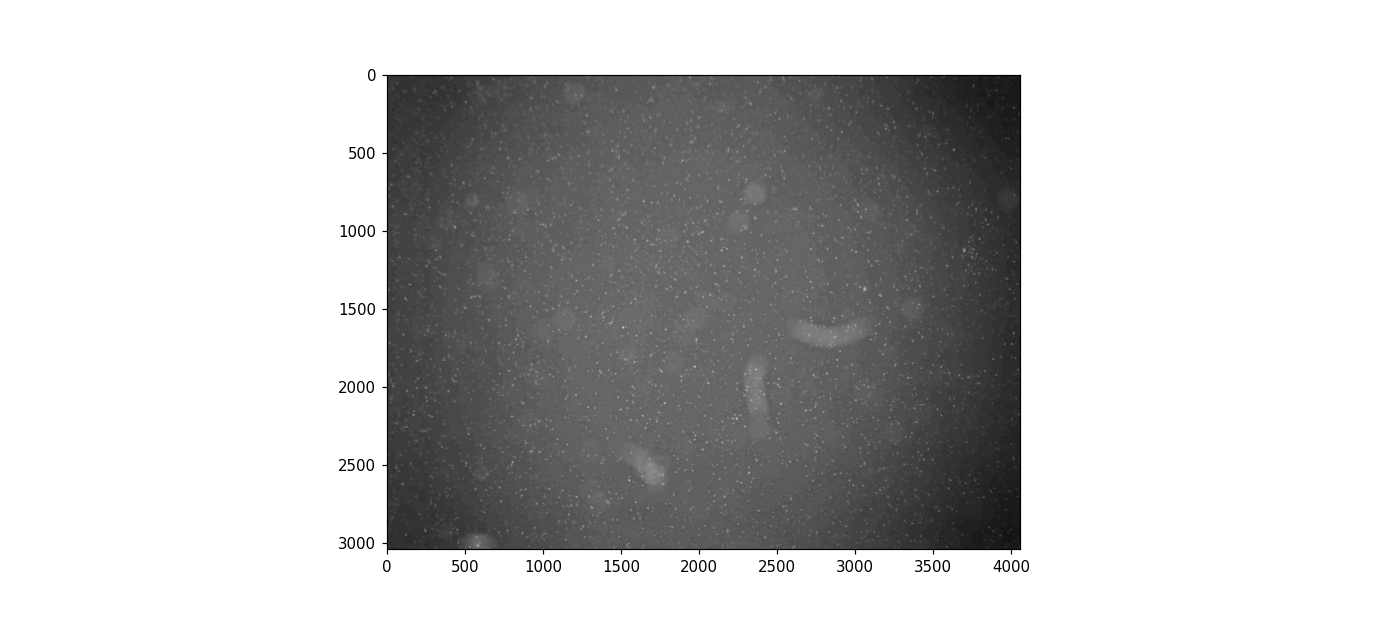

In [113]:
blue = get_color_ch(stack, 'g') #!!! ATENTION - BLUE IS NOW GREEN!
print(blue.shape)
print(blue[0].dtype)
plt.imshow(blue[0],cmap='gray')
plt.imshow(np.invert(blue[0]),cmap='gray')
blue_channel = blue

(3040, 4056)


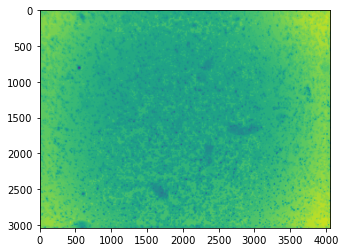

In [7]:
print(blue_channel[50].shape)
plt.imshow(blue_channel[50])

854


[Text(0.5, 0, 'mass'), Text(0, 0.5, 'count')]

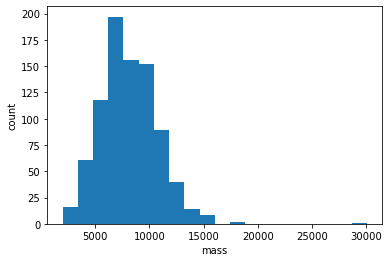

In [16]:
diameter = 71
min_mass = 500
f = tp.locate(blue[0], diameter, invert=True,  minmass=min_mass)
print(len(f))
f.head()

fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count')

#fig.show()

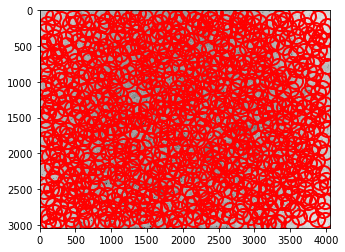

<AxesSubplot:>

In [17]:
tp.annotate(f, blue[0])

In [18]:
f_ = tp.batch(blue_channel[:], diameter, minmass=min_mass, invert=True)


Frame 70: 856 features


/Users/byatharth/opt/miniconda3/envs/swim/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/byatharth/opt/miniconda3/envs/swim/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/byatharth/opt/miniconda3/envs/swim/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/byatharth/opt/miniconda3/envs/swim/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for t

In [104]:
# Smaller average speed parameter used.
t = tp.link(f_, 75, memory=5) #Create trajectories
t1 = tp.filter_stubs(t, 50)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())


Frame 70: 856 trajectories present.
Before: 2893
After: 371


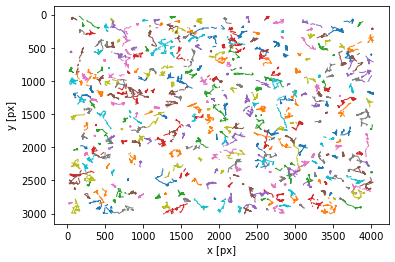

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [105]:
%matplotlib inline
plt.figure()
tp.plot_traj(t1)

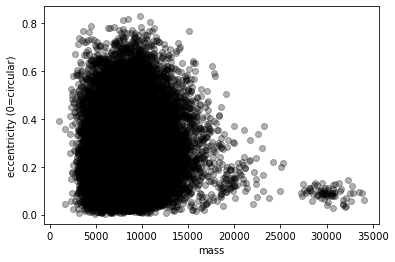

<AxesSubplot:xlabel='mass', ylabel='eccentricity (0=circular)'>

In [106]:
tp.mass_ecc(t1)

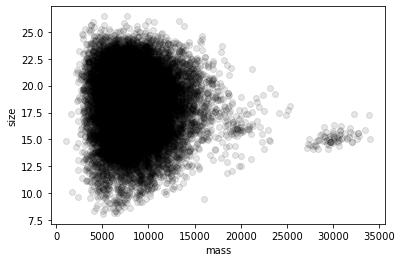

<AxesSubplot:xlabel='mass', ylabel='size'>

In [107]:
tp.mass_size(t1)

220560


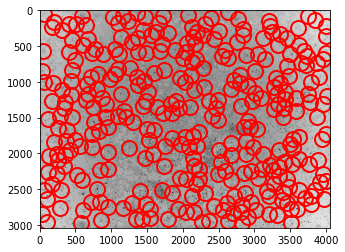

<AxesSubplot:>

In [108]:
%matplotlib inline
# Additional filtering
t2 = t1[((t1['mass'] < 20000) & (t1['size'] < 25) &
         (t1['ecc'] < 0.7))]
print(t2.size)
plt.figure()
tp.annotate(t2[t2['frame'] == 20], blue_channel[20])

<IPython.core.display.Javascript object>


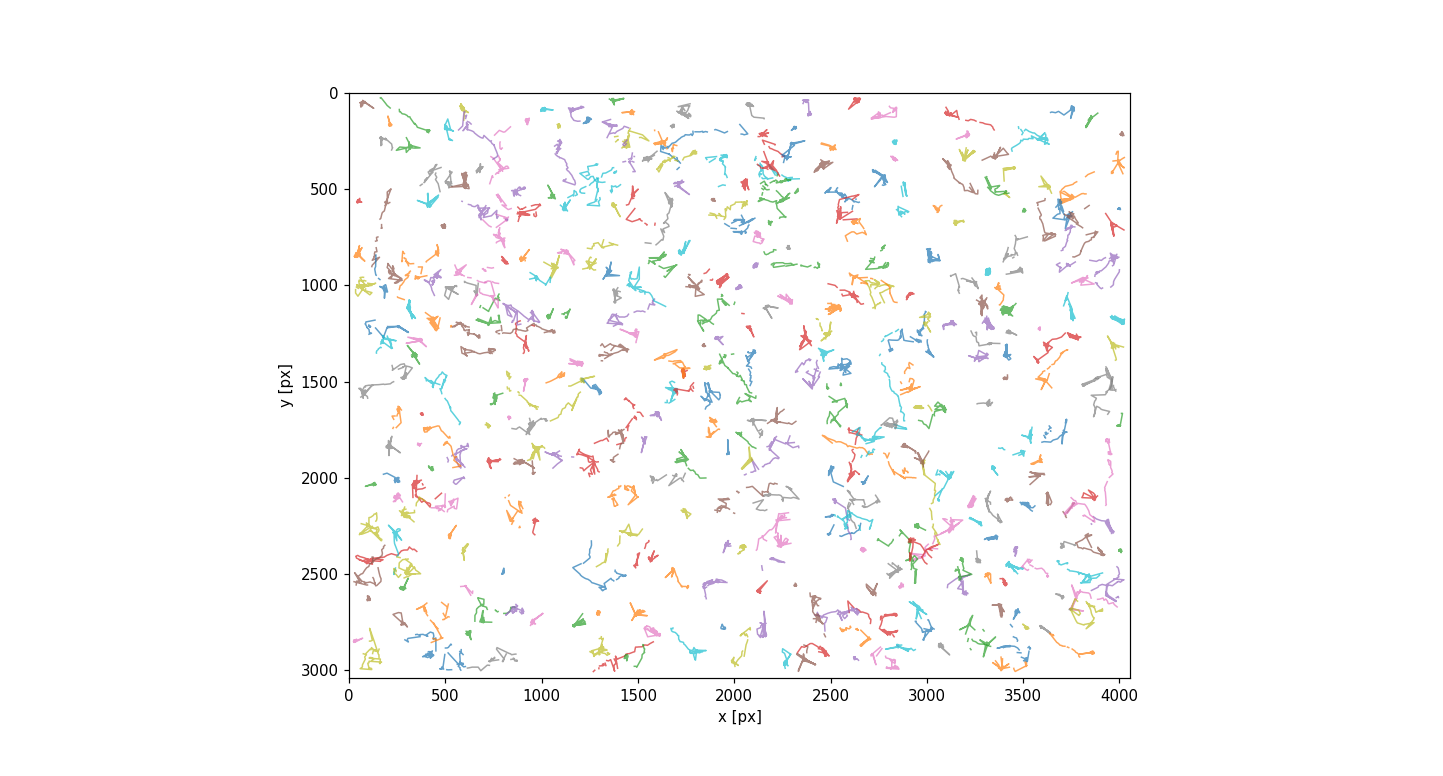

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [111]:
%matplotlib notebook
plt.figure()
tp.plot_traj(t2, \
             superimpose=blue[0]+(1/blue[-1]),\
             plot_style={"alpha":0.7})
# The last frame should be white dots and the first is daark dots (the first one has been inverted)

In [32]:
# Another filter that can be applied -> MSD. Objects with near zero MSD can be discarded.

In [ ]:
# Experimentation with overlay

def overlay(out_filename, stack, traj, alpha=0.5):
    """
    For a given stack, the trajectory plot is overlayed on the 
    """
    